In [64]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler


from sklearn.metrics import mean_squared_error
from math import sqrt

import matplotlib.pyplot as plt

In [65]:
df = pd.read_csv('refixed_price_only_timeseries.csv')

df.datetime = pd.to_datetime(df.datetime)
df = df.set_index(df.datetime)
df.drop(columns = 'datetime', inplace = True)
df.drop(df.loc[df['GBP/mWh'].isna()].index, inplace = True)
df.sort_index(inplace = True)

## The 'Dumb' Method is our baseline model. This method simply looks at the price now, and believes that 24 hours from now it will be the same price

In [67]:
df['pred_one_day'] = df['GBP/mWh'].shift(+24)
df['difference_one_day'] = (df['pred_one_day'] - df['GBP/mWh']).abs()

In [68]:
train_df = df[:52590]
test_df = df[52590:]

In [69]:
test_df['one_day_difference_percentage'] = ((test_df['difference_one_day']+1)/(test_df['GBP/mWh']+1))*100

one_day_difference_percentage_average = test_df['one_day_difference_percentage'].mean()
one_day_difference_percentage_average


/Users/carterbouley/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


17.33011600027282

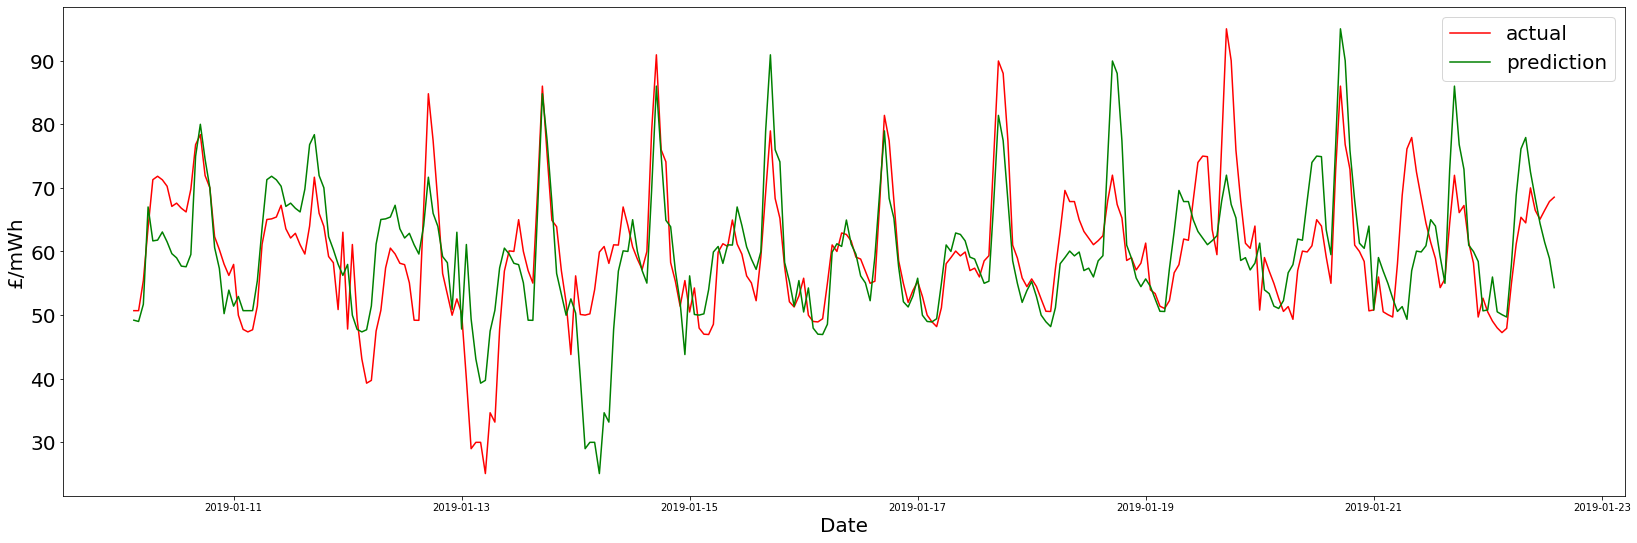

In [103]:
fig, ax = plt.subplots(figsize = (28,9))



ax.set_xlabel('Date', fontsize=20)
ax.set_ylabel('£/mWh', fontsize=20)
ax.plot(test_df['GBP/mWh'][200:500], label = 'actual', color = 'r')
ax.plot(test_df['pred_one_day'][200:500], label = 'prediction', color = 'g')
ax.tick_params(axis='y', labelsize = 20)

ax.legend(prop={'size': 20})
